In [82]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [232]:
data = pd.read_csv('../../../data/close_prices.csv')
djva = pd.read_csv('../../../data/djia_index.csv')

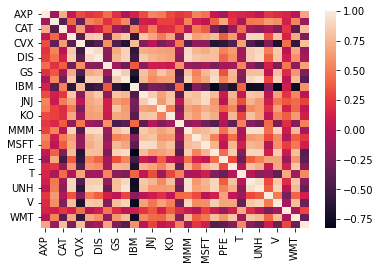

In [233]:
sns.heatmap(data.corr());

In [234]:
train = data.drop('date', axis=1)
train.shape

(374, 30)

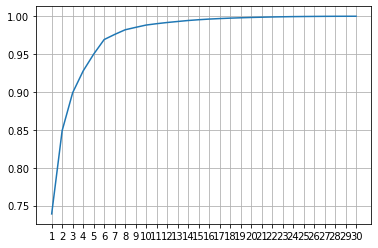

In [235]:
n_col = len(train.columns)
var = []
for i in range(n_col):
    pca = PCA(n_components=n_col-i)
    pca.fit(train)
    var.append(pca.explained_variance_ratio_.sum())
plt.plot([n_col-i for i in range(n_col)], var)
plt.xticks([n_col-i for i in range(n_col)])
plt.grid(True)

In [236]:
pca = PCA(n_components=4)
pca.fit(train).explained_variance_ratio_.sum()

0.92774295378364

In [237]:
train.head(2)

,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,HD,...,PFE,PG,T,TRV,UNH,UTX,V,VZ,WMT,XOM
0,76.440002,117.510002,85.029999,24.270000,125.519997,59.409999,64.75,24.280001,165.250000,75.910004,...,28.799999,79.279999,34.220001,86.379997,71.82,109.419998,196.240005,47.98,76.419998,87.750000
1,76.070000,119.000000,85.110001,24.139999,124.489998,59.319997,64.32,24.320000,162.970001,76.040001,...,28.709999,78.620003,34.090000,85.870003,72.32,110.000000,193.339996,47.27,75.750000,87.360001


In [238]:
train_fitted = train @ pca.components_.T

In [239]:
train_fitted.head(2)

,0,1,2,3
0,271.409336,-281.50704,-156.515694,60.746181
1,269.464830,-279.99181,-156.979170,62.768746


In [240]:
fitter

,0,1,2,3
0,271.409336,-281.507040,-156.515694,60.746181
1,269.464830,-279.991810,-156.979170,62.768746
2,267.697300,-279.211359,-156.141757,63.070519
3,269.711173,-279.197146,-157.303603,62.956414
4,269.941616,-276.849653,-155.840848,61.983544
...,...,...,...,...
369,403.602719,-281.138185,-173.745839,72.350081
370,400.215273,-278.491697,-170.402576,73.209261
371,406.109939,-282.186304,-172.504371,74.543708
372,401.507529,-279.994357,-171.184345,76.546404


In [241]:
pca.singular_values_

array([753.53936404, 290.82384392, 195.9132354 , 148.62951526])

In [242]:
first_comp = pca.components_[0]
first_comp

array([ 1.61383840e-02,  1.20644923e-01, -5.16612711e-02,  5.04842369e-02,
       -1.25859933e-01,  1.14089567e-01,  2.33906290e-01, -6.20513749e-03,
        2.51227032e-01,  2.88996029e-01, -2.64998795e-01,  9.31320168e-02,
        9.13948403e-02,  4.69879340e-02,  2.90549417e-02, -2.61068828e-02,
        3.29615584e-01,  7.13897133e-02,  7.62295699e-02,  2.11888868e-01,
        2.30922941e-02,  7.77316954e-02, -7.20594590e-03,  1.89479745e-01,
        3.21564017e-01,  5.36834873e-02,  5.79683946e-01,  1.09122230e-04,
        8.71614334e-02, -4.29421420e-02])

In [243]:
pca.components_[0].argmax()

26

In [244]:
train.columns[26]

'V'

In [245]:
djva.iloc[:, 1].shape

(374,)

In [246]:
djva.head()

,date,^DJI
0,2013-09-23,15401.379883
1,2013-09-24,15334.589844
2,2013-09-25,15273.259766
3,2013-09-26,15328.299805
4,2013-09-27,15258.240234


In [247]:
correaltion = pd.DataFrame({1:train @ pca.components_[0].T, 2:djva.iloc[:, 1]})
correaltion.corr()

,1,2
1,1.000000,0.909652
2,0.909652,1.000000
